In [4]:
## **DATA ANALYSIS PTYHON PROJECT - BLINKIT ANALYSIS**

In [5]:
## ****IMPORT LIBRARIES ****

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sbn

In [12]:
## **Import Raw Data**

In [9]:
df =pd.read_csv("C:/Users/priya/Downloads/BlinkIT Grocery Data (1).csv")

In [10]:
df.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [19]:
## **Size_Of_Data **

In [13]:
df.shape

(8523, 12)

In [15]:
print("Size of data:", df.shape)

Size of data: (8523, 12)


In [20]:
## **Fields_Info**

In [17]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [22]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [32]:
## **DATA CLEANING**

In [26]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [30]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})


In [31]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [33]:
## **BUSINESS KPI REQUIREMENTS**

In [35]:
# TotalSales
TotalSales = df['Sales'].sum()

# AverageSales
AverageSales = df['Sales'].mean()

# Total Number of Items
Totalnoitems = df['Sales'].count()

# Average Rating
AverageRating = df['Rating'].mean()

# Display
print(f"TotalSales: ${TotalSales:,.0f}")
print(f"AverageSales: ${AverageSales:,.0f}")
print(f"Total Number of Items: {Totalnoitems:,}")
print(f"Average Rating: {AverageRating:.1f}")


TotalSales: $1,201,681
AverageSales: $141
Total Number of Items: 8,523
Average Rating: 4.0


In [36]:
## **CHART REQUIREMENTS**

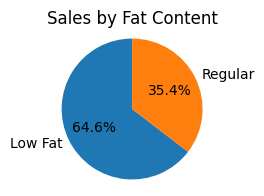

In [42]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plot.figure(figsize=(2,2))  
plot.pie(sales_by_fat,
        labels=sales_by_fat.index,
        autopct='%.1f%%',
        startangle=90)

plot.title('Sales by Fat Content')
plot.axis('equal') 
plot.show()


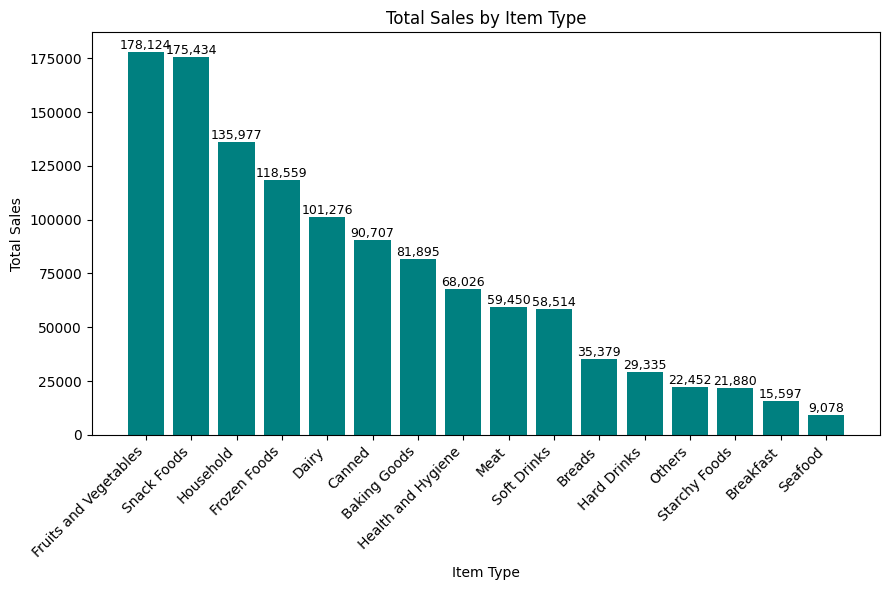

In [16]:



# Group and sort sales by item type
item_sales_type = df.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)

# Create the plot
plot.figure(figsize=(9, 6))
bars = plot.bar(item_sales_type.index, item_sales_type.values, color='teal')

# Customize axes and title
plot.xticks(rotation=45, ha='right')  # Better angle for label readability
plot.xlabel("Item Type")
plot.ylabel("Total Sales")
plot.title("Total Sales by Item Type")

# Add sales values on top of each bar
for bar in bars:
    height = bar.get_height()
    plot.text(bar.get_x() + bar.get_width() / 2, height, f"{height:,.0f}",
             ha='center', va='bottom', fontsize=9)

# Optimize layout
plot.tight_layout()
plot.show()


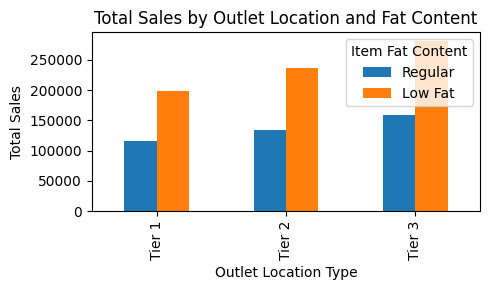

In [18]:
grouped_sales = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()

# Reorder columns if needed
grouped_sales = grouped_sales[['Regular', 'Low Fat']]  # You can adjust this if other categories exist

# Plot the grouped data
ax = grouped_sales.plot(kind='bar', figsize=(5, 3), title='Total Sales by Outlet Location and Fat Content')
plot.xlabel('Outlet Location Type')
plot.ylabel('Total Sales')
plot.legend(title='Item Fat Content')
plot.tight_layout()
plot.show()

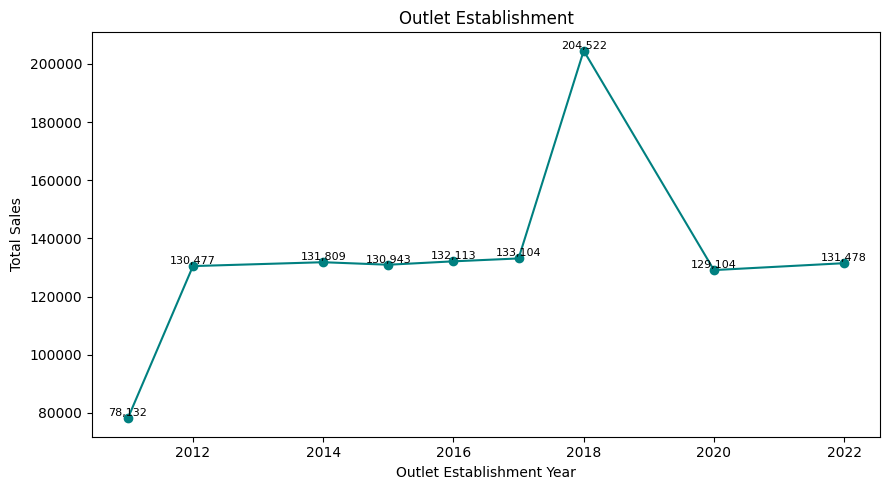

In [27]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

# Create the plot
plot.figure(figsize=(9, 5))
plot.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='teal')

# Label axes and title
plot.xlabel('Outlet Establishment Year')
plot.ylabel('Total Sales')
plot.title('Outlet Establishment')

# Annotate each data point
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plot.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

# Layout adjustments
plot.tight_layout()
plot.show()

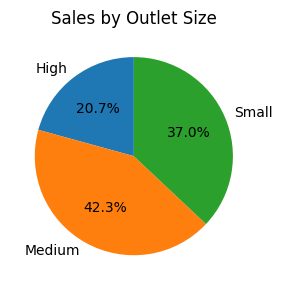

In [36]:


# Group sales by outlet size
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

# Create the pie chart
plot.figure(figsize=(3, 3))
plot.pie(sales_by_size, 
        labels=sales_by_size.index, 
        autopct='%1.1f%%', 
        startangle=90,) 
         # Optional: Custom color palette

# Set chart title
plot.title('Sales by Outlet Size')

# Optimize layout and show plot
plot.tight_layout()
plot.show()


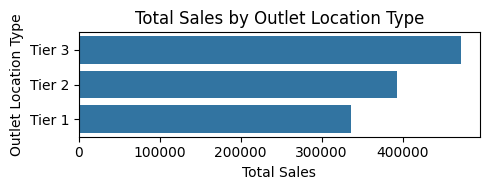

In [49]:


# Step 1: Group and sort sales by location type
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

# Step 2: Create horizontal bar plot
plot.figure(figsize=(5, 2))  # Wide and compact layout
sbn.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

# Step 3: Customize labels and appearance
plot.title('Total Sales by Outlet Location Type')
plot.xlabel('Total Sales')
plot.ylabel('Outlet Location Type')

# Step 4: Final layout and show plot
plot.tight_layout()
plot.show()
